In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sb


df = pd.read_csv('2021.csv')
df.head()

,id,age,Дата первого занятия,Курс,М2
0,2538,11.0,28.02.2021,Unity,0
1,2615,12.0,14.02.2021,Unity,0
2,2643,14.0,21.02.2021,Веб-дизайн,1
3,2968,11.0,24.01.2021,Python Базовый,0
4,3014,15.0,14.03.2021,Веб-дизайн,1


In [ ]:
# Предобработка
df = df.dropna()
df['Дата первого занятия'] = df['Дата первого занятия'].apply(lambda date: datetime.strptime(date, '%d.%m.%Y'))
df['age'] = df['age'].astype(int)
df.head()

,id,age,Дата первого занятия,Курс,М2
0,2538,11,2021-02-28,Unity,0
1,2615,12,2021-02-14,Unity,0
2,2643,14,2021-02-21,Веб-дизайн,1
3,2968,11,2021-01-24,Python Базовый,0
4,3014,15,2021-03-14,Веб-дизайн,1


In [415]:
def get_count_by_course(course, m2=False):
  if not m2:    
    return len(df[(datetime(2021, 4, 1) < df['Дата первого занятия'] + 
                  timedelta(days=28)) & (df['М2'] == 0) & (df['Курс'] == course)])
  return len(df[(datetime(2021, 4, 1) >= df['Дата первого занятия'] + 
                  timedelta(days=28)) & (df['М2'] == 1) & (df['Курс'] == course)])

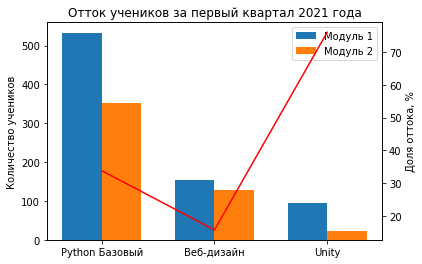

In [416]:
courses = ['Python Базовый', 'Веб-дизайн', 'Unity']
python_basic_count1 = get_count_by_course(course=courses[0])
python_basic_count2 = get_count_by_course(course=courses[0], m2=True)

web_design_count1 = get_count_by_course(course=courses[1])
web_design_count2 = get_count_by_course(course=courses[1], m2=True)

unity_count1 = get_count_by_course(course=courses[2])
unity_count2 = get_count_by_course(course=courses[2], m2=True)

x = np.arange(len(courses))
width = 0.35

y1 = [python_basic_count1, web_design_count1, unity_count1]
y2 = [python_basic_count2, web_design_count2, unity_count2]

fig, ax1 = plt.subplots()
cols1 = ax1.bar(x - width / 2, y1, width, label='Модуль 1')
cols2 = ax1.bar(x + width / 2, y2, width, label='Модуль 2')

ax1.set_ylabel('Количество учеников')
ax1.set_title('Отток учеников за первый квартал 2021 года')
ax1.set_xticks(x)
ax1.set_xticklabels(courses)

ax2 = ax1.twinx()
ax2.set_ylabel('Доля оттока, %')

y = [(p1 - p2) / p1 * 100 for p1, p2 in zip(y1, y2)]
sb.lineplot(y=y, x=x, color='red')

ax1.legend()
plt.show()

# Вывод

Наблюдается отток учеников после первого модуля для всех курсов:
*   наибольший отток зафиксирован для курса **Unity**;
*   наименьший отток зафиксирован для курса **Веб-дизайн**.

In [411]:
def get_count_by_age(age, m2=False):
  if not m2:    
    return len(df[(datetime(2021, 4, 1) < df['Дата первого занятия'] + 
                  timedelta(days=28)) & (df['М2'] == 0) & (df['age'] == age) & (df['Курс'] == 'Python Базовый')])
  return len(df[(datetime(2021, 4, 1) >= df['Дата первого занятия'] + 
                  timedelta(days=28)) & (df['М2'] == 1) & (df['age'] == age) & (df['Курс'] == 'Python Базовый')])

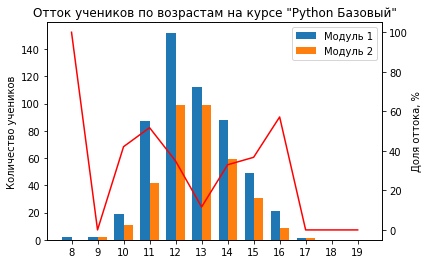

In [424]:
age = sorted(np.unique(df['age']))

x = np.arange(len(age))
width = 0.35

y1 = [get_count_by_age(age=a) for a in age]
y2 = [get_count_by_age(age=a, m2=True) for a in age]

fig, ax1 = plt.subplots()
cols1 = ax1.bar(x - width / 2, y1, width, label='Модуль 1')
cols2 = ax1.bar(x + width / 2, y2, width, label='Модуль 2')

ax1.set_ylabel('Количество учеников')
ax1.set_title('Отток учеников по возрастам на курсе "Python Базовый"')
ax1.set_xticks(x)
ax1.set_xticklabels(age)

ax2 = ax1.twinx()
ax2.set_ylabel('Доля оттока, %')

y = [(p1 - p2) / p1 * 100 if p1 != 0 else 0 for p1, p2 in zip(y1, y2)]  # + случай, когда количество учеников равно 0
sb.lineplot(y=y, x=x, color='red')

ax1.legend()
plt.show()

# Вывод

Наблюдается отток учеников в возрасте **9-11** и **14-16** лет на данном курсе. Принимаем выдвинутую гипотезу. 

Замечания:

*   Зафикисрован отток 100% среди учеников в возрасте 8 лет;
*   Количество учеников в возрасте 8-9 и 17-19 лет стремится к нулю на данном курсе как на первом, так и на втором модулях.